In [2]:
import numpy as np
import pandas as pd

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
original_dataset= pd.read_csv('airbnb-listings.csv',delimiter=';',low_memory='False')

C:\Users\sharm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,27,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
drop_cols=['Listing Url','Thumbnail Url','Medium Url','Picture Url','XL Picture Url',
'Host URL','Host Thumbnail Url','Host Picture Url','Latitude','Longitude']

In [6]:
first_drop_dataset=original_dataset.drop(drop_cols,axis=1)

In [7]:
first_drop_dataset.Price.isnull().sum()

7958

In [8]:
first_drop_dataset.shape

(494954, 79)

In [9]:
first_drop_dataset.head(2)

,ID,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15802051,20170304065726,2017-03-05,Large double available now.,Double room available,NaN,Double room available,none,NaN,NaN,NaN,NaN,NaN,NaN,46296095,Miles,2015-10-11,"London, England, United Kingdom",Easy going man....just trying to make the worl...,within a few hours,100.0,NaN,Walworth,2.0,2.0,"email,phone,reviews","Kennington Park Rd, London, England SE11 4PP, ...",NaN,Lambeth,NaN,London,England,SE11 4PP,London,"London, United Kingdom",GB,United Kingdom,House,Private room,2.0,1.0,2.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",NaN,44.0,NaN,NaN,100.0,NaN,1.0,15.0,3.0,1125.0,2 months ago,NaN,29.0,59.0,89.0,364.0,2017-03-04,3.0,2016-11-18,2017-01-02,93.0,9.0,9.0,10.0,9.0,10.0,10.0,NaN,NaN,strict,2.0,0.83,"51.4814235208219,-0.11325857795918481",Host Has Profile Pic
1,14751869,20170304065726,2017-03-05,Spacious 4BR home near Brixton and Clapham,My home is a large four bedroom space set over...,"This is a bright, tidy, and spacious home in a...",My home is a large four bedroom space set over...,none,Both Brixton and Clapham are very trendy areas...,Please note: our standard check in times are b...,My place is about a 15 minute walk from both t...,Guests have complete access to the entire flat...,"When I’m not there, you will be hosted by a pr...",Please note our house rules: -All guests are ...,11850512,Richard,2014-02-01,"London, UK",I work in London and enjoy travelling and para...,within an hour,100.0,NaN,Brixton,1.0,1.0,"email,phone,reviews,jumio","Bonham Road, London, England SW2 5HN, United K...",Brixton,Lambeth,NaN,London,England,SW2 5HN,London,"London, United Kingdom",GB,United Kingdom,House,Entire home/apt,8.0,1.5,4.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Buzzer/w...",NaN,139.0,NaN,NaN,400.0,65.0,1.0,0.0,3.0,1125.0,today,NaN,0.0,0.0,0.0,0.0,2017-03-04,21.0,2016-09-18,2017-02-25,95.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,moderate,1.0,3.73,"51.45561582099232,-0.12283906738535272","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [10]:
first_drop_dataset.Price.isnull().sum()

7958

In [11]:
first_drop_dataset.columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Host ID',
       'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 

In [12]:
first_drop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 79 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Scrape ID                       494954 non-null  object 
 2   Last Scraped                    494953 non-null  object 
 3   Name                            494536 non-null  object 
 4   Summary                         478753 non-null  object 
 5   Space                           347019 non-null  object 
 6   Description                     494794 non-null  object 
 7   Experiences Offered             494954 non-null  object 
 8   Neighborhood Overview           291604 non-null  object 
 9   Notes                           197643 non-null  object 
 10  Transit                         303786 non-null  object 
 11  Access                          268402 non-null  object 
 12  Interaction     

In [22]:
#new_air['Availability 30'].value_counts()

In [137]:
#new=new_air.loc[:,['City','Zipcode','Property Type','Room Type','Accommodates','Bathrooms','Bedrooms','Beds',
 #              'Bed Type','Amenities','Square Feet','Price','Security Deposit','Cleaning Fee','Guests Included',
  #             'Minimum Nights','Availability 30','Number of Reviews','Review Scores Rating','Review Scores Accuracy',
   #            'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location',
    #           'Review Scores Value','Cancellation Policy']]

In [60]:
494954-7958

486996

In [61]:
new.Price.isnull().sum()

7958

In [85]:
#new1=new.loc[new.Price>=0]

In [ ]:
# Price                        486371 |    486996

In [138]:
first_drop_dataset['Country Code'].unique()

array(['GB', 'US', 'ES', 'AU', 'CA', 'NL', 'GR', 'DE', 'BE', 'DK', 'IE',
       'HK', 'CN', 'CH', 'FR', 'IT', 'AT', nan, 'MX', 'UY', 'CU', 'It',
       'VU', 'VA'], dtype=object)

In [191]:
first_drop_dataset.select_dtypes(include='O').columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Neighbourhood', 'Host Verifications',
       'Street', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Property Type',
       'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
       'Has Availability', 'Calendar last Scraped', 'First Review',
       'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy',
       'Geolocation', 'Features'],
      dtype='object')

In [13]:
new=first_drop_dataset.loc[first_drop_dataset['Country Code']=='US']

In [14]:
import seaborn as sns

In [113]:
#Accommodates,Bathrooms,Bedrooms,Beds,sqare Feet,Security Deposit,Cleaning Fee,Guests Included

In [15]:
new.corr()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Host ID,1.000000,-0.035971,-0.028238,-0.028238,0.003155,0.013008,-0.009545,0.012558,-0.122420,-0.030328,-0.113534,-0.031489,-0.070683,-0.035259,-0.037254,-0.053147,-0.041048,-0.003867,0.079566,0.080437,0.079576,-0.031647,-0.205953,-0.040012,-0.034476,-0.017896,-0.036844,-0.054307,-0.009723,0.007837,-0.031805,0.132473
Host Response Rate,-0.035971,1.000000,0.008005,0.008005,0.051454,0.011511,0.022437,0.046141,-0.060180,-0.004118,0.024620,-0.012756,-0.004552,-0.021432,0.067583,0.028544,-0.016872,0.000440,-0.118264,-0.108882,-0.100809,-0.049582,0.125492,0.104776,0.096393,0.127586,0.098236,0.102136,0.047434,0.098995,0.023443,0.154960
Host Listings Count,-0.028238,0.008005,1.000000,1.000000,0.068160,0.065867,0.054351,0.043813,-0.008762,0.081473,-0.026917,0.133246,0.026786,0.135693,-0.034214,-0.054684,0.009804,-0.000664,0.093963,0.094660,0.092602,0.065147,-0.043581,-0.060522,-0.060454,-0.004263,-0.075563,-0.091507,-0.004385,-0.074479,0.672248,-0.050122
Host Total Listings Count,-0.028238,0.008005,1.000000,1.000000,0.068160,0.065867,0.054351,0.043813,-0.008762,0.081473,-0.026917,0.133246,0.026786,0.135693,-0.034214,-0.054684,0.009804,-0.000664,0.093963,0.094660,0.092602,0.065147,-0.043581,-0.060522,-0.060454,-0.004263,-0.075563,-0.091507,-0.004385,-0.074479,0.672248,-0.050122
Accommodates,0.003155,0.051454,0.068160,0.068160,1.000000,0.567732,0.753274,0.820264,0.403363,0.573297,0.350256,0.546158,0.280283,0.588749,0.531798,0.140580,-0.013184,0.002631,0.062951,0.060037,0.061358,0.114517,0.000070,0.008480,-0.010973,0.034633,-0.000602,-0.015284,-0.006308,-0.017974,0.107087,0.016328
Bathrooms,0.013008,0.011511,0.065867,0.065867,0.567732,1.000000,0.650213,0.574975,0.459533,0.461025,-0.013945,0.538447,0.256710,0.563426,0.299669,0.093780,0.010810,-0.001158,0.085725,0.072767,0.065451,0.083277,-0.071277,0.028460,0.001894,0.024378,-0.002799,-0.016186,0.000732,0.004182,0.117679,-0.064736
Bedrooms,-0.009545,0.022437,0.054351,0.054351,0.753274,0.650213,1.000000,0.732731,0.445697,0.546514,0.141301,0.541316,0.296909,0.588801,0.447578,0.108351,0.006396,-0.001609,0.047984,0.038125,0.033749,0.072451,-0.066527,0.032569,0.004814,0.033127,0.017319,0.002657,-0.005931,0.004798,0.073946,-0.076798
Beds,0.012558,0.046141,0.043813,0.043813,0.820264,0.574975,0.732731,1.000000,0.372535,0.483930,0.234022,0.492704,0.256266,0.541495,0.475747,0.129884,-0.003099,0.001462,0.067173,0.059781,0.059253,0.109790,-0.004796,-0.003821,-0.024587,0.021502,-0.005353,-0.019087,-0.021816,-0.019151,0.102535,0.005775
Square Feet,-0.122420,-0.060180,-0.008762,-0.008762,0.403363,0.459533,0.445697,0.372535,1.000000,0.358502,0.145995,0.312412,0.181723,0.383602,0.266244,0.111823,0.008585,0.012937,0.082414,0.070334,0.060742,0.048838,-0.137314,0.086473,0.038346,0.052370,0.030321,0.008062,0.057208,0.028782,-0.002086,-0.140297
Price,-0.030328,-0.004118,0.081473,0.081473,0.573297,0.461025,0.546514,0.483930,0.358502,1.000000,0.634008,0.815957,0.393314,0.649980,0.312492,0.097365,0.007067,-0.001747,0.055300,0.041263,0.033300,0.041561,-0.093251,0.072650,0.031185,0.076713,0.019687,0.014746,0.119251,-0.011753,0.075582,-0.117306


C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

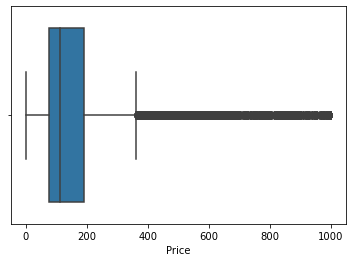

In [142]:
sns.boxplot(new.Price)

C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

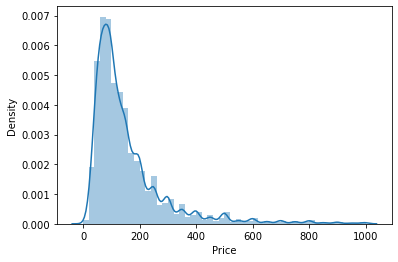

In [143]:
sns.distplot(new.Price)

In [99]:
# price ko log laga ke halka sa normalize kro

In [101]:
new.Price.max(),new.Price.min()

(999.0, 0.0)

In [104]:
new.Price.value_counts().sort_index(ascending=True)

0.0       8
3.0       1
10.0     41
11.0      3
12.0     10
         ..
995.0    33
996.0     1
997.0     3
998.0     3
999.0    90
Name: Price, Length: 797, dtype: int64

In [105]:
new.Price.skew()

2.6446920617683762

In [ ]:
#zero drop kr na hai 

In [91]:
#squarefeet hata diya hai
# sirf vo column include kiyea hai jis mai corr 0.30 se upr aaya hai
final=new.loc[:,['Price','Accommodates','Bathrooms','Bedrooms','Beds','Security Deposit','Cleaning Fee','Guests Included',
                 "City",'Zipcode','Property Type','Room Type','Bed Type','Amenities','Cancellation Policy']]

In [123]:
new2['Square Feet'].isnull().sum()

132454

<AxesSubplot:>

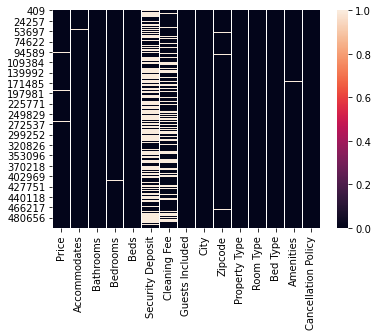

In [92]:
# sirf US ka data hai jis m abhi bhi null values hai 
sns.heatmap(final.isnull())

In [93]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134545 entries, 409 to 494313
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Price                132581 non-null  float64
 1   Accommodates         134484 non-null  float64
 2   Bathrooms            134116 non-null  float64
 3   Bedrooms             134388 non-null  float64
 4   Beds                 134316 non-null  float64
 5   Security Deposit     57615 non-null   float64
 6   Cleaning Fee         97234 non-null   float64
 7   Guests Included      134545 non-null  float64
 8   City                 134486 non-null  object 
 9   Zipcode              132845 non-null  object 
 10  Property Type        134539 non-null  object 
 11  Room Type            134545 non-null  object 
 12  Bed Type             134545 non-null  object 
 13  Amenities            133318 non-null  object 
 14  Cancellation Policy  134545 non-null  object 
dtypes: float64(8), 

In [150]:
final.shape

(134545, 8)

In [152]:
print('null values in final dataset, which need to be removed : ',134545-132581)

null values in final dataset, which need to be removed :  1964


In [94]:
# df final data hai jis m sari null n disturbing values(0) hata diyea hai 
df=final[final.Price>0]

In [130]:
df.reset_index(inplace=True)

In [132]:
df.drop('index',axis=1,inplace=True)

In [133]:
df.head()

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,City,Zipcode,Property Type,Room Type,Bed Type,Amenities,Cancellation Policy,price_log,price_sqrt
0,150.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,Los Angeles,91364,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",flexible,5.010635,12.247449
1,175.0,8.0,3.5,4.0,4.0,300.0,150.0,8.0,Los Angeles,91364,House,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Pool,Kitche...",flexible,5.164786,13.228757
2,79.0,3.0,1.0,1.0,1.0,NaN,55.0,1.0,Los Angeles,91367,Guesthouse,Entire home/apt,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",flexible,4.369448,8.888194
3,175.0,2.0,1.5,1.0,1.0,500.0,100.0,1.0,Woodland Hills,91364,Other,Entire home/apt,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",strict,5.164786,13.228757
4,450.0,6.0,2.5,3.0,4.0,NaN,200.0,6.0,Los Angeles,91367,Townhouse,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",moderate,6.109248,21.213203


In [134]:
df.shape

(132573, 17)

In [96]:
df.isnull().sum()

Price                      0
Accommodates              61
Bathrooms                419
Bedrooms                 156
Beds                     220
Security Deposit       75256
Cleaning Fee           36504
Guests Included            0
City                      58
Zipcode                 1665
Property Type              6
Room Type                  0
Bed Type                   0
Amenities               1176
Cancellation Policy        0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132573 entries, 409 to 494313
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Price                132573 non-null  float64
 1   Accommodates         132512 non-null  float64
 2   Bathrooms            132154 non-null  float64
 3   Bedrooms             132417 non-null  float64
 4   Beds                 132353 non-null  float64
 5   Security Deposit     57317 non-null   float64
 6   Cleaning Fee         96069 non-null   float64
 7   Guests Included      132573 non-null  float64
 8   City                 132515 non-null  object 
 9   Zipcode              130908 non-null  object 
 10  Property Type        132567 non-null  object 
 11  Room Type            132573 non-null  object 
 12  Bed Type             132573 non-null  object 
 13  Amenities            131397 non-null  object 
 14  Cancellation Policy  132573 non-null  object 
dtypes: float64(8), 

<AxesSubplot:>

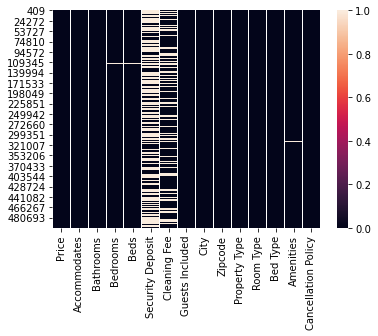

In [98]:
sns.heatmap(df.isnull())

In [196]:
dfnum=df.select_dtypes(include=np.number)

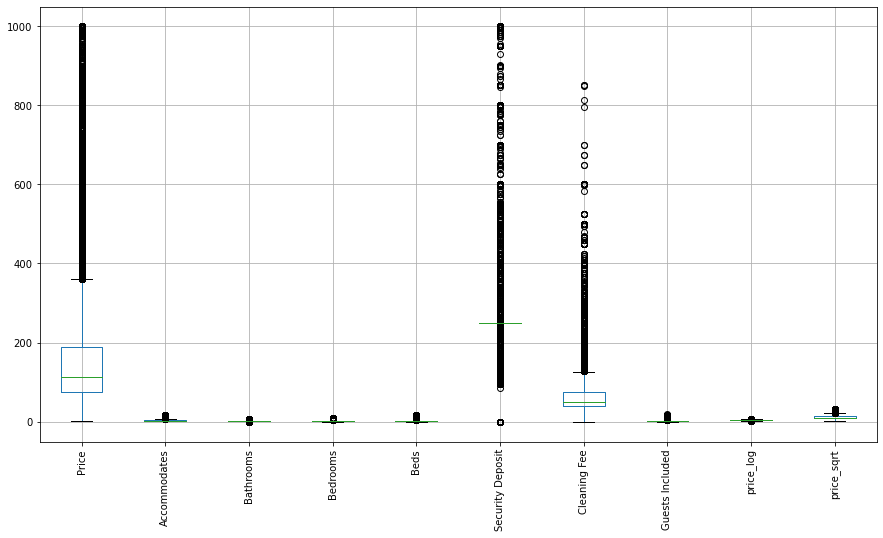

In [199]:
plt.figure(figsize=[15,8])
dfnum.boxplot()
plt.xticks(rotation=90)
plt.show()

In [200]:
dfcat=df.select_dtypes(include='O')

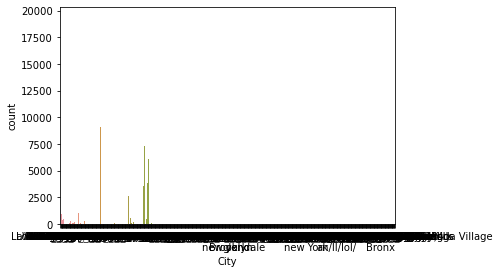

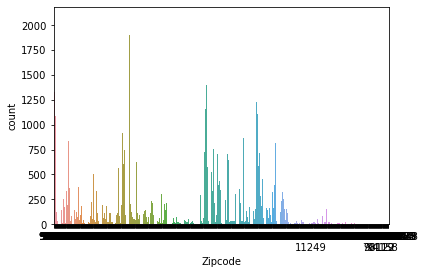

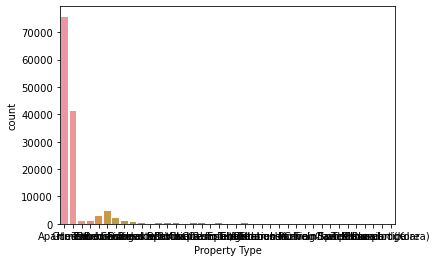

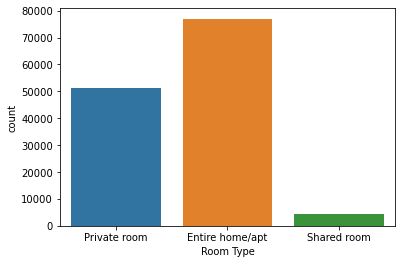

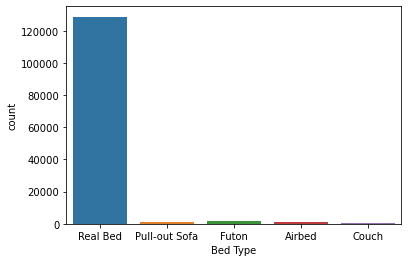

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000175B2F98280> (for post_execute):


KeyboardInterrupt: 

In [203]:
for i in dfcat:
    sns.countplot(dfcat[i])
    plt.show()

In [99]:
df.corr()

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included
Price,1.000000,0.573342,0.461046,0.546549,0.483943,0.393305,0.649982,0.312529
Accommodates,0.573342,1.000000,0.532973,0.740949,0.817657,0.273326,0.569495,0.548028
Bathrooms,0.461046,0.532973,1.000000,0.606899,0.541856,0.248785,0.492053,0.304631
Bedrooms,0.546549,0.740949,0.606899,1.000000,0.714407,0.290139,0.556659,0.461101
Beds,0.483943,0.817657,0.541856,0.714407,1.000000,0.249977,0.522600,0.485538
Security Deposit,0.393305,0.273326,0.248785,0.290139,0.249977,1.000000,0.469606,0.192362
Cleaning Fee,0.649982,0.569495,0.492053,0.556659,0.522600,0.469606,1.000000,0.339336
Guests Included,0.312529,0.548028,0.304631,0.461101,0.485538,0.192362,0.339336,1.000000


In [204]:
dfnum.skew()

Price               2.644807
Accommodates        1.991670
Bathrooms           3.104939
Bedrooms            1.740916
Beds                3.119863
Security Deposit    1.825943
Cleaning Fee        2.848526
Guests Included     3.241969
price_log           0.332779
price_sqrt          1.417326
dtype: float64

<AxesSubplot:xlabel='Price'>

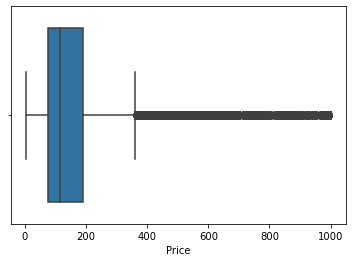

In [100]:
sns.boxplot(df.Price)

In [101]:
df['price_log']=np.log(df.Price)
df['price_sqrt']=np.sqrt(df.Price)

C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


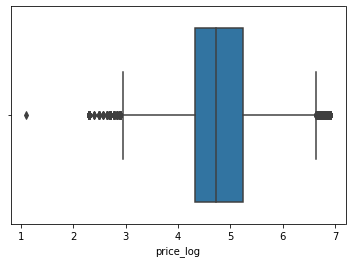

C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


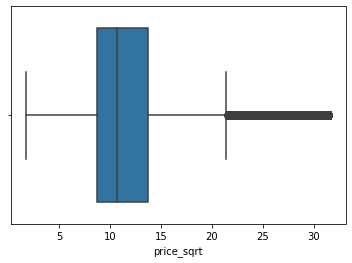

In [37]:
sns.boxplot(df.price_log)
plt.show()
sns.boxplot(df.price_sqrt)
plt.show()

In [35]:
import matplotlib.pyplot as plt

In [102]:
print('original :',df.Price.skew())
print('log :',df.price_log.skew())
print('sqrt :',df.price_sqrt.skew())

original : 2.6448069090698776
log : 0.33277923686169236
sqrt : 1.4173257845100555


<AxesSubplot:xlabel='price_log', ylabel='Density'>

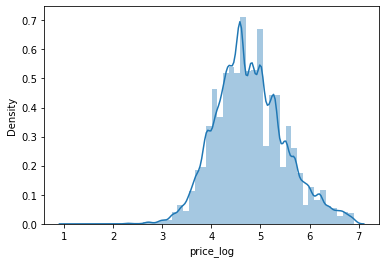

In [103]:
sns.distplot(df.price_log)

<AxesSubplot:xlabel='Price', ylabel='Security Deposit'>

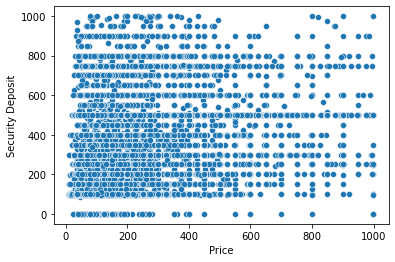

In [41]:
sns.scatterplot(x='Price',y='Security Deposit',data=df)

<AxesSubplot:xlabel='price_log', ylabel='Security Deposit'>

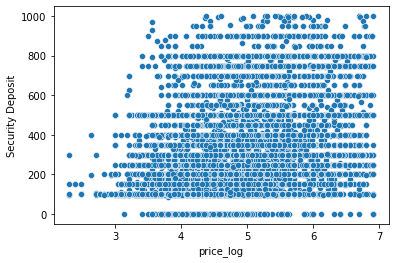

In [42]:
sns.scatterplot(x='price_log',y='Security Deposit',data=df)

In [47]:
df['Security Deposit'].value_counts()

100.0    11270
500.0     9966
200.0     8771
300.0     6111
250.0     6042
         ...  
749.0        1
397.0        1
969.0        1
680.0        1
522.0        1
Name: Security Deposit, Length: 281, dtype: int64

In [104]:
df['Security Deposit'].median(),df['Security Deposit'].mean()

(250.0, 273.8550691766841)

In [105]:
df.isnull().sum()

Price                      0
Accommodates              61
Bathrooms                419
Bedrooms                 156
Beds                     220
Security Deposit       75256
Cleaning Fee           36504
Guests Included            0
City                      58
Zipcode                 1665
Property Type              6
Room Type                  0
Bed Type                   0
Amenities               1176
Cancellation Policy        0
price_log                  0
price_sqrt                 0
dtype: int64

In [106]:
#imputing median of security into missing values of security deposit

In [138]:
df['Security Deposit'].fillna(df['Security Deposit'].median(),inplace=True)

In [139]:
df['Security Deposit'].isnull().sum()

0

In [140]:
df.isnull().sum()

Price                      0
Accommodates              61
Bathrooms                419
Bedrooms                 156
Beds                     220
Security Deposit           0
Cleaning Fee           36504
Guests Included            0
City                      58
Zipcode                 1665
Property Type              6
Room Type                  0
Bed Type                   0
Amenities               1176
Cancellation Policy        0
price_log                  0
price_sqrt                 0
dtype: int64

In [136]:
df['Cleaning Fee'].isnull().sum()

36504

In [142]:
df['Cleaning Fee'].median()

50.0

In [143]:
##imputing median of cleaning fee into missing values of cleaning fee

In [144]:
df['Cleaning Fee'].fillna(df['Cleaning Fee'].median(),inplace=True)

In [145]:
df.isnull().sum()

Price                     0
Accommodates             61
Bathrooms               419
Bedrooms                156
Beds                    220
Security Deposit          0
Cleaning Fee              0
Guests Included           0
City                     58
Zipcode                1665
Property Type             6
Room Type                 0
Bed Type                  0
Amenities              1176
Cancellation Policy       0
price_log                 0
price_sqrt                0
dtype: int64

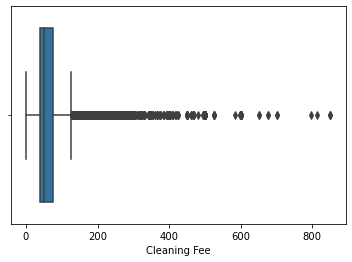

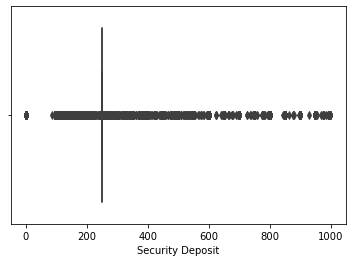

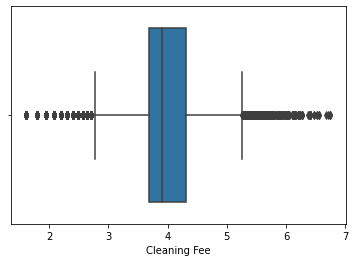

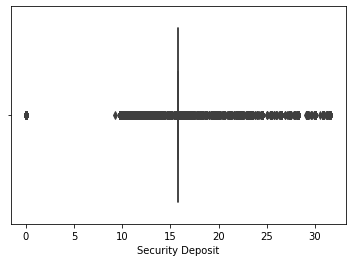

In [153]:
sns.boxplot(df['Cleaning Fee'])
plt.show()
sns.boxplot(df['Security Deposit'])
plt.show()

sns.boxplot(np.log(df['Cleaning Fee']))
plt.show()
sns.boxplot(np.sqrt(df['Security Deposit']))
plt.show()

In [54]:
df['Cleaning Fee'].skew()

2.268063527657322

<AxesSubplot:xlabel='Security Deposit', ylabel='Density'>

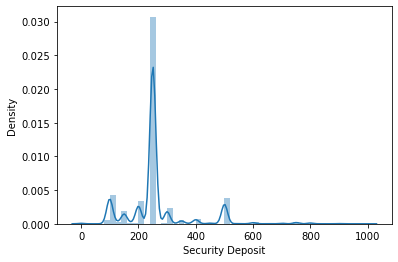

In [154]:
sns.distplot(df['Security Deposit'])

In [57]:
df['Cleaning Fee'].value_counts()

50.0     11104
100.0     8176
25.0      6825
20.0      5794
75.0      5590
         ...  
274.0        1
333.0        1
259.0        1
151.0        1
305.0        1
Name: Cleaning Fee, Length: 294, dtype: int64

In [58]:
df['Cleaning Fee'].median(),df['Cleaning Fee'].mean()

(50.0, 67.45978411350175)

In [155]:
df.isnull().sum()

Price                     0
Accommodates             61
Bathrooms               419
Bedrooms                156
Beds                    220
Security Deposit          0
Cleaning Fee              0
Guests Included           0
City                     58
Zipcode                1665
Property Type             6
Room Type                 0
Bed Type                  0
Amenities              1176
Cancellation Policy       0
price_log                 0
price_sqrt                0
dtype: int64

In [163]:
df1=df.dropna(subset=['Accommodates','Bathrooms','Bedrooms','Beds','City'])

In [158]:
df.shape

(132573, 17)

In [164]:
df1.isnull().sum()

Price                     0
Accommodates              0
Bathrooms                 0
Bedrooms                  0
Beds                      0
Security Deposit          0
Cleaning Fee              0
Guests Included           0
City                      0
Zipcode                1607
Property Type             5
Room Type                 0
Bed Type                  0
Amenities              1082
Cancellation Policy       0
price_log                 0
price_sqrt                0
dtype: int64

In [165]:
df1.groupby('City')['Price'].sum().sort_values(ascending=False)

City
New York         3203983.0
Los Angeles      2600220.0
Austin           2063794.0
Brooklyn         1839736.0
San Francisco    1730725.0
                   ...    
TORRANCE              29.0
Manchaca              27.0
longbeach             26.0
hollis                21.0
波摩纳                   20.0
Name: Price, Length: 760, dtype: float64

In [170]:
df1['Cancellation Policy'].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_30',
       'super_strict_60', 'no_refunds', 'long_term'], dtype=object)

In [166]:
df1.head()

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,City,Zipcode,Property Type,Room Type,Bed Type,Amenities,Cancellation Policy,price_log,price_sqrt
0,150.0,2.0,1.0,1.0,1.0,250.0,50.0,1.0,Los Angeles,91364,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",flexible,5.010635,12.247449
1,175.0,8.0,3.5,4.0,4.0,300.0,150.0,8.0,Los Angeles,91364,House,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Pool,Kitche...",flexible,5.164786,13.228757
2,79.0,3.0,1.0,1.0,1.0,250.0,55.0,1.0,Los Angeles,91367,Guesthouse,Entire home/apt,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",flexible,4.369448,8.888194
3,175.0,2.0,1.5,1.0,1.0,500.0,100.0,1.0,Woodland Hills,91364,Other,Entire home/apt,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",strict,5.164786,13.228757
4,450.0,6.0,2.5,3.0,4.0,250.0,200.0,6.0,Los Angeles,91367,Townhouse,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",moderate,6.109248,21.213203


In [172]:
df1['Property Type'].unique()

array(['Apartment', 'House', 'Guesthouse', 'Other', 'Townhouse',
       'Condominium', 'Loft', 'Bed & Breakfast', 'Bungalow', 'Hostel',
       'Serviced apartment', 'Boat', 'Dorm', 'Villa', 'Castle',
       'Boutique hotel', 'Cabin', 'Guest suite', 'Camper/RV', 'Tent',
       'Entire Floor', 'Timeshare', 'Lighthouse', 'Treehouse',
       'Vacation home', 'Hut', nan, 'Yurt', 'Cave', 'Train', 'In-law',
       'Chalet', 'Tipi', 'Earth House', 'Plane', 'Island', 'Nature lodge',
       'Casa particular', 'Pension (Korea)'], dtype=object)

In [175]:
df1.Amenities.unique()

array(['TV,Wireless Internet,Air conditioning,Free parking on premises,Hot tub,Heating,Smoke detector,Carbon monoxide detector,Essentials,Shampoo',
       'Wireless Internet,Air conditioning,Pool,Kitchen,Free parking on premises,Pets allowed,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,TV',
       'TV,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Hangers,Laptop friendly workspace',
       ...,
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Heating,Washer,Dryer,Hair dryer,translation missing: en.hosting_amenity_50',
       'TV,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Pets allowed,Hot tub,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Car

In [176]:
df1['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [177]:
df1['Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [178]:
df1.head()

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,City,Zipcode,Property Type,Room Type,Bed Type,Amenities,Cancellation Policy,price_log,price_sqrt
0,150.0,2.0,1.0,1.0,1.0,250.0,50.0,1.0,Los Angeles,91364,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",flexible,5.010635,12.247449
1,175.0,8.0,3.5,4.0,4.0,300.0,150.0,8.0,Los Angeles,91364,House,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Pool,Kitche...",flexible,5.164786,13.228757
2,79.0,3.0,1.0,1.0,1.0,250.0,55.0,1.0,Los Angeles,91367,Guesthouse,Entire home/apt,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",flexible,4.369448,8.888194
3,175.0,2.0,1.5,1.0,1.0,500.0,100.0,1.0,Woodland Hills,91364,Other,Entire home/apt,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",strict,5.164786,13.228757
4,450.0,6.0,2.5,3.0,4.0,250.0,200.0,6.0,Los Angeles,91367,Townhouse,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",moderate,6.109248,21.213203


In [181]:
df1.shape

(131806, 17)

In [185]:
#df2 is made to keep df1 safe and encoding can be done on df2, df2 has city, property type and amenities left to be encoded 
df2=pd.get_dummies(data=df1,columns=['Cancellation Policy','Room Type','Bed Type'])

In [186]:
df2.head()

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,City,Zipcode,Property Type,Amenities,price_log,price_sqrt,Cancellation Policy_flexible,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed
0,150.0,2.0,1.0,1.0,1.0,250.0,50.0,1.0,Los Angeles,91364,Apartment,"TV,Wireless Internet,Air conditioning,Free par...",5.010635,12.247449,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,175.0,8.0,3.5,4.0,4.0,300.0,150.0,8.0,Los Angeles,91364,House,"Wireless Internet,Air conditioning,Pool,Kitche...",5.164786,13.228757,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,79.0,3.0,1.0,1.0,1.0,250.0,55.0,1.0,Los Angeles,91367,Guesthouse,"TV,Wireless Internet,Air conditioning,Kitchen,...",4.369448,8.888194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,175.0,2.0,1.5,1.0,1.0,500.0,100.0,1.0,Woodland Hills,91364,Other,"TV,Cable TV,Wireless Internet,Air conditioning...",5.164786,13.228757,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,450.0,6.0,2.5,3.0,4.0,250.0,200.0,6.0,Los Angeles,91367,Townhouse,"TV,Cable TV,Internet,Wireless Internet,Air con...",6.109248,21.213203,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [187]:
df2.isnull().sum()

Price                                     0
Accommodates                              0
Bathrooms                                 0
Bedrooms                                  0
Beds                                      0
Security Deposit                          0
Cleaning Fee                              0
Guests Included                           0
City                                      0
Zipcode                                1607
Property Type                             5
Amenities                              1082
price_log                                 0
price_sqrt                                0
Cancellation Policy_flexible              0
Cancellation Policy_long_term             0
Cancellation Policy_moderate              0
Cancellation Policy_no_refunds            0
Cancellation Policy_strict                0
Cancellation Policy_super_strict_30       0
Cancellation Policy_super_strict_60       0
Room Type_Entire home/apt                 0
Room Type_Private room          

In [194]:
df2.shape

(131806, 29)

In [195]:
df1.head(5)

,Price,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,City,Zipcode,Property Type,Room Type,Bed Type,Amenities,Cancellation Policy,price_log,price_sqrt
0,150.0,2.0,1.0,1.0,1.0,250.0,50.0,1.0,Los Angeles,91364,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Free par...",flexible,5.010635,12.247449
1,175.0,8.0,3.5,4.0,4.0,300.0,150.0,8.0,Los Angeles,91364,House,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Pool,Kitche...",flexible,5.164786,13.228757
2,79.0,3.0,1.0,1.0,1.0,250.0,55.0,1.0,Los Angeles,91367,Guesthouse,Entire home/apt,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",flexible,4.369448,8.888194
3,175.0,2.0,1.5,1.0,1.0,500.0,100.0,1.0,Woodland Hills,91364,Other,Entire home/apt,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",strict,5.164786,13.228757
4,450.0,6.0,2.5,3.0,4.0,250.0,200.0,6.0,Los Angeles,91367,Townhouse,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",moderate,6.109248,21.213203


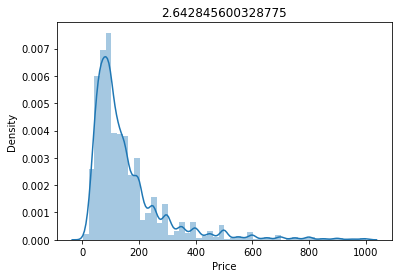

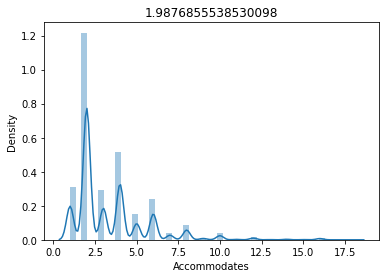

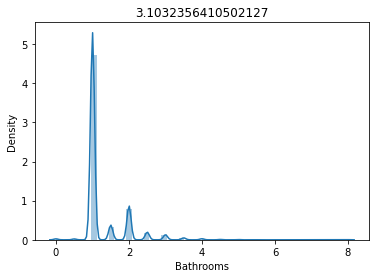

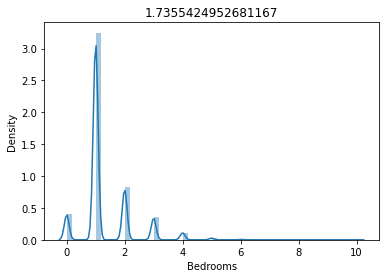

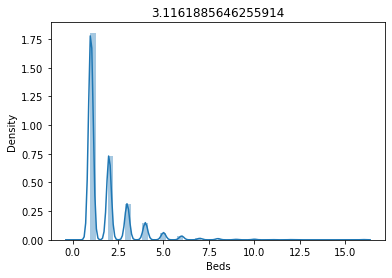

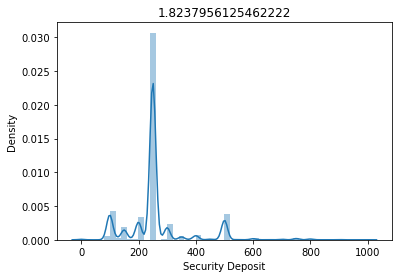

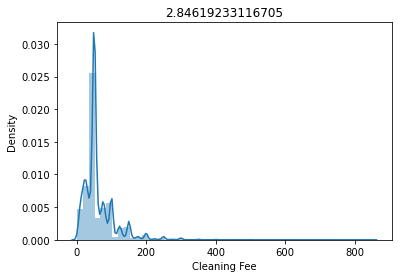

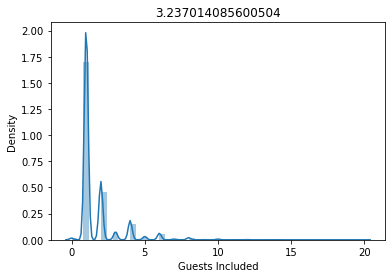

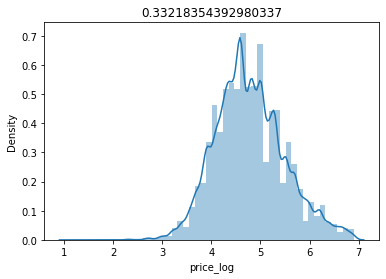

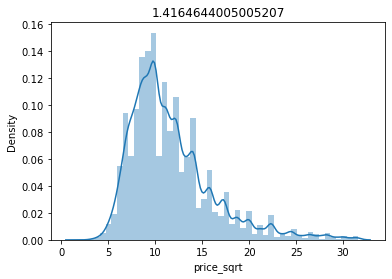

In [210]:
df1num=df1.select_dtypes(include=np.number)
plt.plot(subplots=True)
for i in df1num:
    sns.distplot(df1num[i])
    plt.title(df1num[i].skew())
    plt.show()